In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### 1读取并合并数据
#### 1.1 读取生存结果数据

In [2]:
gender_submission_data = pd.read_csv("gender_submission.csv")
gender_submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### 1.2 读取测试数据

In [3]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 1.3 读取训练数据

In [4]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1.4 合并数据并用来做基础分析
##### 1.41 合并测试数据及结果

In [5]:
test_data.insert(loc=1,column="Survived",value=gender_submission_data.Survived)
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### 1.42替换列名为中文方便观察与合并

In [6]:
new_columns = ["乘客ID","是否生还","舱位","姓名","性别","年龄","兄弟姐妹/配偶的个数","父母/小孩个数","船票信息","票价","客舱号","登船港口"]
test_data.columns = new_columns
train_data.columns = new_columns
train_data.head()

,乘客ID,是否生还,舱位,姓名,性别,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,船票信息,票价,客舱号,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 1.42 合并所有数据为一张表

In [7]:
test_data.dtypes

乘客ID            int64
是否生还            int64
舱位              int64
姓名             object
性别             object
年龄            float64
兄弟姐妹/配偶的个数      int64
父母/小孩个数         int64
船票信息           object
票价            float64
客舱号            object
登船港口           object
dtype: object

In [8]:
train_data.dtypes

乘客ID            int64
是否生还            int64
舱位              int64
姓名             object
性别             object
年龄            float64
兄弟姐妹/配偶的个数      int64
父母/小孩个数         int64
船票信息           object
票价            float64
客舱号            object
登船港口           object
dtype: object

In [9]:
# titanic_data = pd.merge(test_data,train_data,left_index=True,right_index=True,how='left')
# titanic_data

In [10]:
titanic_data = pd.concat([train_data,test_data],axis=0)
titanic_data

,乘客ID,是否生还,舱位,姓名,性别,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,船票信息,票价,客舱号,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
print(f"合并后共有{titanic_data.shape[0]}行数据 \n 测试数据共有{test_data.shape[0]}行 \n 训练数据共有{train_data.shape[0]}行, \n 训练集占比{test_data.shape[0]/titanic_data.shape[0]}")

合并后共有1309行数据 
 测试数据共有418行 
 训练数据共有891行, 
 训练集占比0.31932773109243695


### 2数据探索
#### 2.1 查看空值情况

In [12]:
for column_name in titanic_data.columns:
    column_data = titanic_data[column_name]
    m = column_data.size
    isna = pd.isna(column_data).sum()
    print(f"{column_name}列的空值比例\t:< {isna/m}% >\t空值个数:< {isna} >")
    

乘客ID列的空值比例	:< 0.0% >	空值个数:< 0 >
是否生还列的空值比例	:< 0.0% >	空值个数:< 0 >
舱位列的空值比例	:< 0.0% >	空值个数:< 0 >
姓名列的空值比例	:< 0.0% >	空值个数:< 0 >
性别列的空值比例	:< 0.0% >	空值个数:< 0 >
年龄列的空值比例	:< 0.20091673032849502% >	空值个数:< 263 >
兄弟姐妹/配偶的个数列的空值比例	:< 0.0% >	空值个数:< 0 >
父母/小孩个数列的空值比例	:< 0.0% >	空值个数:< 0 >
船票信息列的空值比例	:< 0.0% >	空值个数:< 0 >
票价列的空值比例	:< 0.0007639419404125286% >	空值个数:< 1 >
客舱号列的空值比例	:< 0.774637127578304% >	空值个数:< 1014 >
登船港口列的空值比例	:< 0.0015278838808250573% >	空值个数:< 2 >


#### 2.2 查看列数据种类数量

In [13]:
for column_name in titanic_data.columns:
    column_data = titanic_data[column_name]
    print(f"{column_name} 列中有: < {len((set(column_data)))} > 种值")

乘客ID 列中有: < 1309 > 种值
是否生还 列中有: < 2 > 种值
舱位 列中有: < 3 > 种值
姓名 列中有: < 1307 > 种值
性别 列中有: < 2 > 种值
年龄 列中有: < 361 > 种值
兄弟姐妹/配偶的个数 列中有: < 7 > 种值
父母/小孩个数 列中有: < 8 > 种值
船票信息 列中有: < 929 > 种值
票价 列中有: < 282 > 种值
客舱号 列中有: < 187 > 种值
登船港口 列中有: < 4 > 种值


In [14]:
titanic_data.describe()

,乘客ID,是否生还,舱位,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,票价
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### 2.3 画图查看样本平衡情况

Text(0.5, 1.0, 'Survived Rate = 0.37738731856378915')

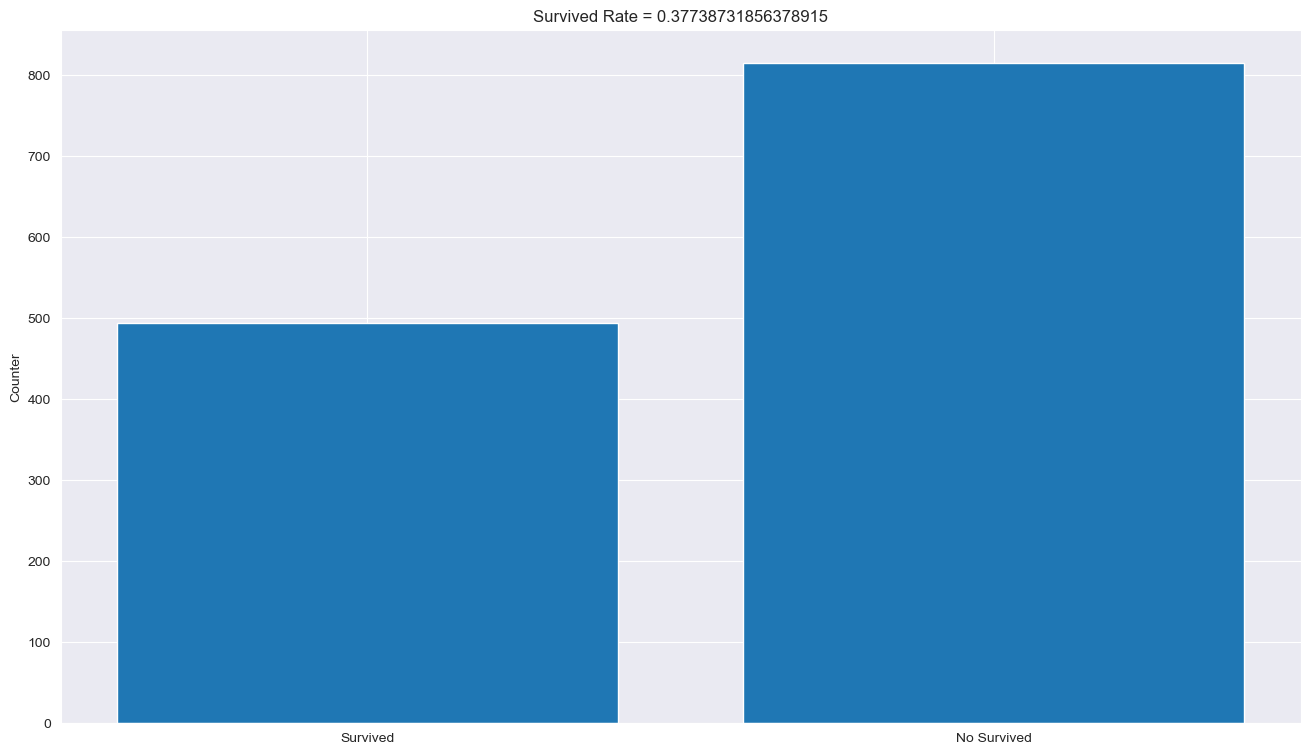

In [15]:
Survived = (titanic_data["是否生还"]==1).sum()
No_Survived = titanic_data.shape[0]-Survived
plt.figure(figsize=(16,9))
plt.ylabel("Counter")
plt.bar(range(2),[Survived,No_Survived],tick_label=["Survived","No Survived"])
plt.title(f"Survived Rate = {Survived/titanic_data.shape[0]}")

### 3.1 特征工程
##### one hot 编码对 舱位 性别 登船港口 三列数据 做特征工程

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


Pclass_elements = list(set(titanic_data["舱位"]))
Pclass_elements

[1, 2, 3]

In [17]:
one_hot_for_Pclass = np.zeros((titanic_data.shape[0],3))   
one_hot_for_Pclass

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [18]:

for m,Pclass in enumerate(titanic_data["舱位"]):
    if Pclass == Pclass_elements[0]:
        one_hot_for_Pclass[m][0]=1
    if Pclass == Pclass_elements[1]:
        one_hot_for_Pclass[m][1]=1
    if Pclass == Pclass_elements[2]:
        one_hot_for_Pclass[m][2]=1
one_hot_for_Pclass   

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [19]:
OneHotPclass= pd.DataFrame(one_hot_for_Pclass
                           ,columns=[f"{Pclass_elements[0]}等舱",f"{Pclass_elements[1]}等舱",f"{Pclass_elements[2]}等舱"])
OneHotPclass

,1等舱,2等舱,3等舱
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
1304,0.0,0.0,1.0
1305,1.0,0.0,0.0
1306,0.0,0.0,1.0
1307,0.0,0.0,1.0


In [20]:
Sex_elements = list(set(titanic_data["性别"]))
Sex_elements

['female', 'male']

In [21]:
one_hot_for_Sex = np.zeros((titanic_data.shape[0],len(Sex_elements)))
one_hot_for_Sex

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [22]:
for m,Sex in enumerate(titanic_data["性别"]):
    if Sex == Sex_elements[0]:
        one_hot_for_Sex[m][0]=1
    if Sex == Sex_elements[1]:
        one_hot_for_Sex[m][1]=1
one_hot_for_Sex

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [23]:
OneHotSex = pd.DataFrame(one_hot_for_Sex,columns=["女性","男性"])
OneHotSex

,女性,男性
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1304,0.0,1.0
1305,1.0,0.0
1306,0.0,1.0
1307,0.0,1.0


In [24]:
Embarked_element = list(set(titanic_data["登船港口"]))
Embarked_element



['C', nan, 'S', 'Q']

In [25]:
one_hot_for_Embarked = np.zeros((titanic_data.shape[0],len(Embarked_element)))
one_hot_for_Embarked

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [26]:
for m,Embarked in enumerate(titanic_data["登船港口"]):
    if Embarked == Embarked_element[0]:
        one_hot_for_Embarked[m][0] = 1
    if Embarked == Embarked_element[1]:
        one_hot_for_Embarked[m][1] = 1
    if Embarked == Embarked_element[2]:
        one_hot_for_Embarked[m][2] = 1
    if Embarked == Embarked_element[3]:
        one_hot_for_Embarked[m][3] = 1
one_hot_for_Embarked



array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [27]:
OneHotEmbarked = pd.DataFrame(one_hot_for_Embarked
                              ,columns=["登船港口为空"
                                        ,f"登船为{Embarked_element[1]}港"
                                        ,f"登船为{Embarked_element[2]}港"
                                        ,f"登船为{Embarked_element[3]}港"])
OneHotEmbarked

,登船港口为空,登船为nan港,登船为S港,登船为Q港
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1304,0.0,0.0,1.0,0.0
1305,1.0,0.0,0.0,0.0
1306,0.0,0.0,1.0,0.0
1307,0.0,0.0,1.0,0.0


#### 整合one hot 编码和待用的列

In [28]:
titanic_data

,乘客ID,是否生还,舱位,姓名,性别,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,船票信息,票价,客舱号,登船港口
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [29]:
x_data = titanic_data[["年龄","兄弟姐妹/配偶的个数","父母/小孩个数","票价"]]

In [30]:
x_data.head()

,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,票价
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [31]:
concat_1 = pd.concat([OneHotPclass,OneHotEmbarked],axis=1)
concat_2 = pd.concat([concat_1,OneHotSex],axis=1)
concat_2.head()

,1等舱,2等舱,3等舱,登船港口为空,登船为nan港,登船为S港,登船为Q港,女性,男性
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [32]:
X_data = pd.concat([x_data.reset_index(),concat_2],axis=1)
X_data = X_data.drop(labels=["index"],axis=1)
X_data = X_data.fillna(0)
# X_data = X_data[['年龄', '兄弟姐妹/配偶的个数', '父母/小孩个数', '票价', '1等舱', '2等舱', '3等舱', '登船港口为空',
#        '登船为nan港', '登船为Q港', '登船为C港', '女性', '男性']]
X_data

,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,票价,1等舱,2等舱,3等舱,登船港口为空,登船为nan港,登船为S港,登船为Q港,女性,男性
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1305,39.0,0,0,108.9000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1306,38.5,0,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1307,0.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### 3.2 画图查看 	年龄 	兄弟姐妹/配偶的个数 	父母/小孩个数 	票价  的分布情况，决定采用归一化或标准化

Text(0, 0.5, 'age')

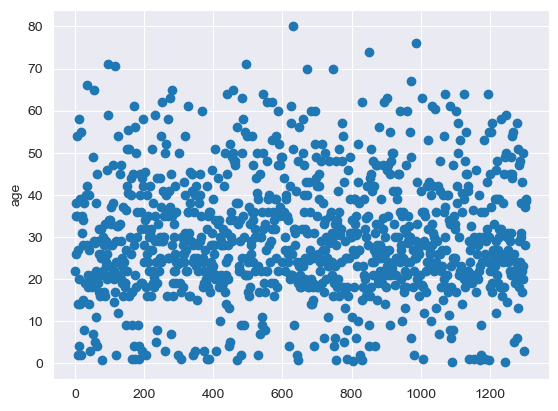

In [33]:
plt.scatter(range(titanic_data.shape[0]),titanic_data["年龄"])

plt.ylabel("age")

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0, flags=flags)


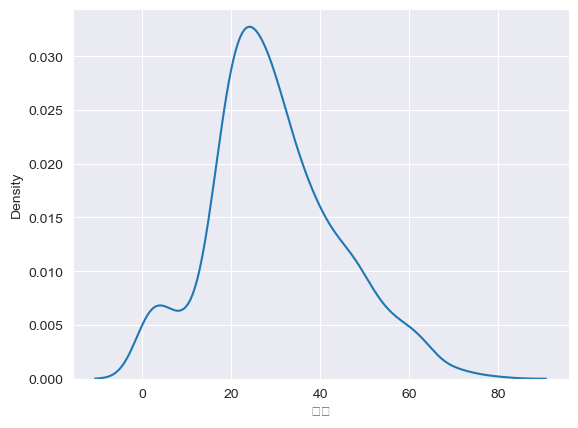

In [34]:
sns.kdeplot(titanic_data["年龄"])

Text(0, 0.5, 'SibSp')

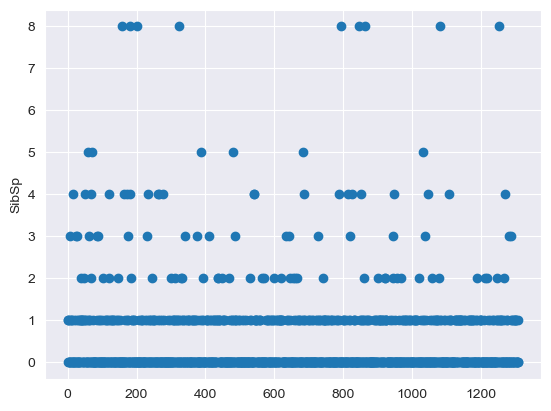

In [35]:
plt.scatter(range(titanic_data.shape[0]),titanic_data["兄弟姐妹/配偶的个数"])
plt.ylabel("SibSp")

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37197 missing from current font.
  font.set_text(s

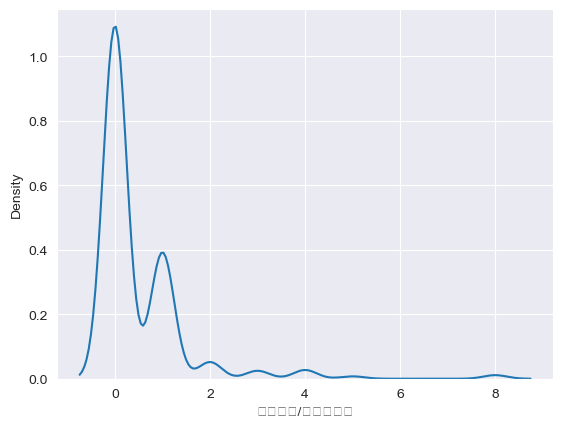

In [36]:
sns.kdeplot(titanic_data["兄弟姐妹/配偶的个数"])

Text(0, 0.5, 'Parch')

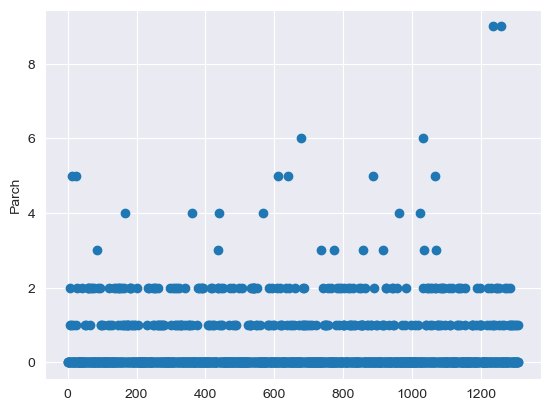

In [37]:
plt.scatter(range(titanic_data.shape[0]),titanic_data["父母/小孩个数"])
plt.ylabel("Parch")

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27597 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23401 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20010 missing from current font.
  font.set_text(s

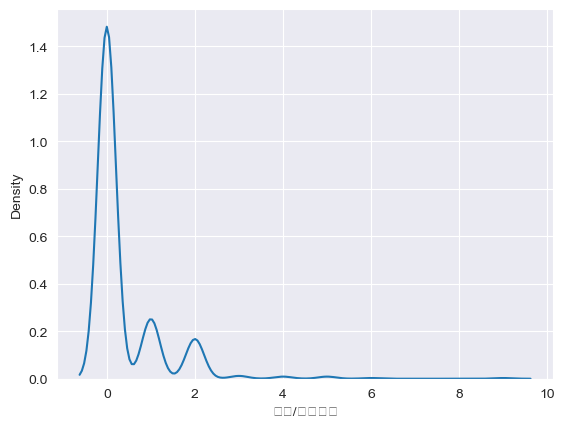

In [38]:
sns.kdeplot(titanic_data["父母/小孩个数"])

Text(0, 0.5, 'Fare')

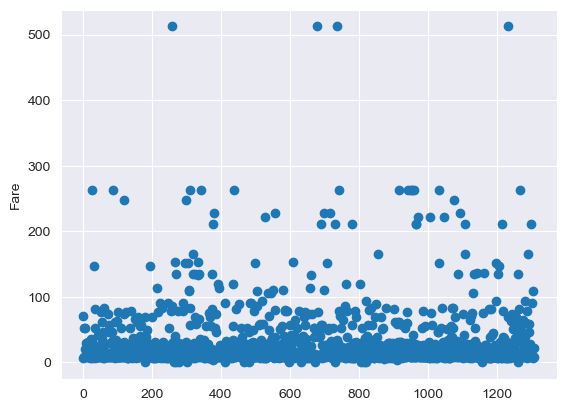

In [39]:
plt.scatter(range(titanic_data.shape[0]),titanic_data["票价"])
plt.ylabel("Fare")

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0, flags=flags)


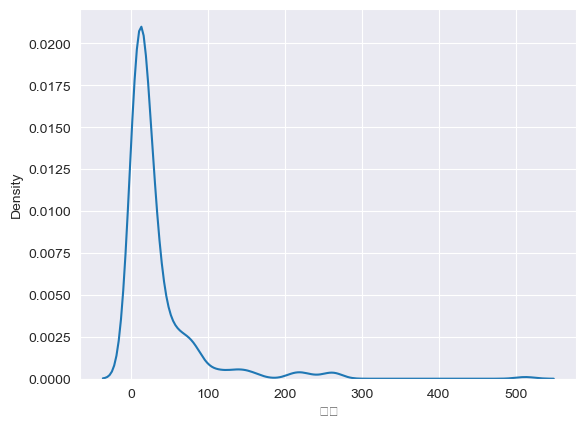

In [40]:
sns.kdeplot(titanic_data["票价"])

### 3.3 观察以上图，票价一栏存在有极端值的情况，所以归一化不合适，更适合使用标准化

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_data)
X = sc.transform(X_data)
Y = np.array(titanic_data["是否生还"])

In [42]:
from sklearn.model_selection import train_test_split

train_X,test_x,train_Y,test_y = train_test_split(X,Y,test_size=0.3193,random_state=42)
train_X.shape

(891, 13)

### 4.1 尝试建立模型并调节参数

#### 4.1.1 逻辑回归测试准确性

In [43]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, # 最大迭代次数
                            random_state=18,#随机数种子
                         
                            penalty="l2", #正则化项
                            solver="lbfgs", # 求解器类型 
                            dual=False, # 当模型数据行比较小，数据列又比较多的时候，可以用这个参数来优化结果
                            tol=1e-4, # 模型损失值小于某一个精度的时候停止迭代
                            C=1.0, #经验风险和结构风险在损失函数中的权重
                            fit_intercept=True,#线性方程中是否包含截距项
                            intercept_scaling=1,
                            class_weight=None, #各类样本在损失值计算的权重 输入结构{0:1,1:3}代表1类样本的每一条数据在计算损失函数的时候都会*3 , 当参数为balanced的时则自动将这个比例调整为真实样本比例的反比，以达到平衡效果
        
                            multi_class="auto", # 选择多分类策略，mvm（多模型合并）还是ovr（交叉熵函数实现多分类）
                            verbose=0,
                            warm_start=False,# 是否使用上次训练结果作为本次初始运行参数
                            n_jobs= None, # 使用多少核心
                            l1_ratio=True #当采用弹性网正则化时，l1正则权重项，就是损失函数中的p
                             )
clf.fit(train_X,train_Y)
clf.score(test_x,test_y)

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


0.861244019138756

In [44]:
from sklearn.metrics import accuracy_score
test_predict =  clf.predict(test_x)
accuracy_score(test_y,test_predict)

0.861244019138756

#### 4.1.2 Xgboosting 测试准确性

In [45]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier( learning_rate =0.1
               , n_estimators=9 #即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越 大，模型的效果往往越好。但是相应的，任何模型都有决策边  n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
               , max_depth=12 #构建树的深度，越大越容易过拟合
               , min_child_weight=0.0001 #孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
               , num_class = 1#类别数，与 multisoftmax 并用
               , gamma=0 #损失下降多少才进行分裂， 控制叶子节点的个数
               , subsample=0.8 #随机采样训练样本
               , colsample_bytree=0.97 #生成树时进行的列采样
               , objective= 'binary:logistic' # 损失函数，默认为"reg:linear"。 {'binary:logistic'}是二分类的问题，{'multi:softmax',}是多分类的问题 这个是优化目标，必须得有，因为xgboost里面有求一阶导数和二阶导数，其实就是这个。
               , nthread=4 #cpu 线程数
               , scale_pos_weight=1.0 #负样本总数/正样本总数 。若训练负样本总数是500 ，正样本总数100，那么设置 scale_pos_weigh为 5
#                , lambda_weight = 2 # 正则化参数
               , eta = 0.001 # 如同学习率
               , num_round = 0.001
#               
#                , metrics='auc'
               , eval_metric = "auc"
                , silent = 0 # ,设置成1则没有运行信息输出，最好是设置为0.
               , seed=30 #这个随机指定一个常数，防止每次结果不一致
                )
train_Y = train_Y.reshape((train_Y.shape[0],1))
xgb1.fit(train_X,train_Y)
xgb1.score(test_x,test_y)


[13:30:00] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:576: 
Parameters: { "num_round", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

0.8803827751196173

In [47]:
xgb1.predict(test_x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,

#### 4.2 数据不做标准化再测试准确率
#### 4.2.1 测试Xgboost的准去率

In [ ]:
train_X,test_x,train_Y,test_y = train_test_split(X_data,Y,test_size=0.3193,random_state=42)
import xgboost as xgb

xgb1 = xgb.XGBClassifier( learning_rate =0.1
               , n_estimators=9 #即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越 大，模型的效果往往越好。但是相应的，任何模型都有决策边  n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
               , max_depth=12 #构建树的深度，越大越容易过拟合
               , min_child_weight=0.0001 #孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
               , num_class = 1#类别数，与 multisoftmax 并用
               , gamma=0 #损失下降多少才进行分裂， 控制叶子节点的个数
               , subsample=0.8 #随机采样训练样本
               , colsample_bytree=0.97 #生成树时进行的列采样
               , objective= 'binary:logistic' # 损失函数，默认为"reg:linear"。 {'binary:logistic'}是二分类的问题，{'multi:softmax',}是多分类的问题 这个是优化目标，必须得有，因为xgboost里面有求一阶导数和二阶导数，其实就是这个。
               , nthread=4 #cpu 线程数
               , scale_pos_weight=1.0 #负样本总数/正样本总数 。若训练负样本总数是500 ，正样本总数100，那么设置 scale_pos_weigh为 5
#                , lambda_weight = 2 # 正则化参数
               , eta = 0.001 # 如同学习率
               , num_round = 0.001
#               
#                , metrics='auc'
               , eval_metric = "auc"
                , silent = 0 # ,设置成1则没有运行信息输出，最好是设置为0.
               , seed=30 #这个随机指定一个常数，防止每次结果不一致
                )
train_Y = train_Y.reshape((train_Y.shape[0],1))
xgb1.fit(train_X,train_Y)
xgb1.score(test_x,test_y)

##### 4.2.2 逻辑回归不做标椎化的预测准确率

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, # 最大迭代次数
                            random_state=18,#随机数种子
                         
                            penalty="l2", #正则化项
                            solver="lbfgs", # 求解器类型 
                            dual=False, # 当模型数据行比较小，数据列又比较多的时候，可以用这个参数来优化结果
                            tol=1e-4, # 模型损失值小于某一个精度的时候停止迭代
                            C=1.0, #经验风险和结构风险在损失函数中的权重
                            fit_intercept=True,#线性方程中是否包含截距项
                            intercept_scaling=1,
                            class_weight=None, #各类样本在损失值计算的权重 输入结构{0:1,1:3}代表1类样本的每一条数据在计算损失函数的时候都会*3 , 当参数为balanced的时则自动将这个比例调整为真实样本比例的反比，以达到平衡效果
        
                            multi_class="auto", # 选择多分类策略，mvm（多模型合并）还是ovr（交叉熵函数实现多分类）
                            verbose=0,
                            warm_start=False,# 是否使用上次训练结果作为本次初始运行参数
                            n_jobs= None, # 使用多少核心
                            l1_ratio=True #当采用弹性网正则化时，l1正则权重项，就是损失函数中的p
                             )
clf.fit(train_X,train_Y)
clf.score(test_x,test_y)

####  以上结果显示,即便不做标准化,预测结果并没有显著差距

#### 4.3 增加特征再尝试,将是否有客舱号作为特征逻辑回归不做归一化的预测准确率

In [48]:
Cabin_data = pd.isna(titanic_data["客舱号"])
Cabin_elements = list(set(Cabin_data))
Cabin_elements

[False, True]

In [49]:
one_hot_for_Cabin = np.zeros((Cabin_data.size,len(Cabin_elements)))
one_hot_for_Cabin

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [50]:
for m,Cabin in enumerate(Cabin_data):
    if  Cabin == Cabin_elements[0]:
        one_hot_for_Cabin[m][0]=1
    if  Cabin == Cabin_elements[1]:
        one_hot_for_Cabin[m][1]=1
one_hot_for_Cabin

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [51]:
OneHotCabin = pd.DataFrame(one_hot_for_Cabin,columns=["有客舱好","没有客舱号"])
OneHotCabin

,有客舱好,没有客舱号
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1304,0.0,1.0
1305,1.0,0.0
1306,0.0,1.0
1307,0.0,1.0


##### 4.3.1 合并进特征表X当中

In [52]:
X_data = pd.concat([X_data,OneHotCabin],axis=1)
X_data

,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,票价,1等舱,2等舱,3等舱,登船港口为空,登船为nan港,登船为S港,登船为Q港,女性,男性,有客舱好,没有客舱号
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1305,39.0,0,0,108.9000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1306,38.5,0,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1307,0.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


#### 4.3.2 标准化数据并拆分出训练与测试数据

In [ ]:
sc = StandardScaler()
sc.fit(X_data)
X = sc.transform(X_data)
train_X,test_x,train_Y,test_y = train_test_split(X,Y,test_size=0.3193,random_state=42)


#### 4.2.3.1 测试Xgbosst

In [ ]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier( learning_rate =0.1
               , n_estimators=9 #即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越 大，模型的效果往往越好。但是相应的，任何模型都有决策边  n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
               , max_depth=12 #构建树的深度，越大越容易过拟合
               , min_child_weight=0.0001 #孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
               , num_class = 1#类别数，与 multisoftmax 并用
               , gamma=0 #损失下降多少才进行分裂， 控制叶子节点的个数
               , subsample=0.9#随机采样训练样本
               , colsample_bytree=0.97 #生成树时进行的列采样
               , objective= 'binary:logistic' # 损失函数，默认为"reg:linear"。 {'binary:logistic'}是二分类的问题，{'multi:softmax',}是多分类的问题 这个是优化目标，必须得有，因为xgboost里面有求一阶导数和二阶导数，其实就是这个。
               , nthread=4 #cpu 线程数
               , scale_pos_weight=1.0 #负样本总数/正样本总数 。若训练负样本总数是500 ，正样本总数100，那么设置 scale_pos_weigh为 5
#                , lambda_weight = 2 # 正则化参数
               , eta = 0.001 # 如同学习率
               , num_round = 0.01
#               
#                , metrics='auc'
               , eval_metric = "auc"
                , silent = 0 # ,设置成1则没有运行信息输出，最好是设置为0.
               , seed=27#个随机指定一个常数，防止每次结果不一致
                )
train_Y = train_Y.reshape((train_Y.shape[0],1))
xgb1.fit(train_X,train_Y)
xgb1.score(test_x,test_y)

#### 4.2.3.2 测试逻辑回归的预测效果

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, # 最大迭代次数
                            random_state=18,#随机数种子
                            penalty="l2", #正则化项
                            solver="lbfgs", # 求解器类型 
                            dual=False, # 当模型数据行比较小，数据列又比较多的时候，可以用这个参数来优化结果
                            tol=1e-4, # 模型损失值小于某一个精度的时候停止迭代
                            C=1.0, #经验风险和结构风险在损失函数中的权重
                            fit_intercept=True,#线性方程中是否包含截距项
                            intercept_scaling=1,
                            class_weight=None, #各类样本在损失值计算的权重 输入结构{0:1,1:3}代表1类样本的每一条数据在计算损失函数的时候都会*3 , 当参数为balanced的时则自动将这个比例调整为真实样本比例的反比，以达到平衡效果
        
                            multi_class="auto", # 选择多分类策略，mvm（多模型合并）还是ovr（交叉熵函数实现多分类）
                            verbose=0,
                            warm_start=False,# 是否使用上次训练结果作为本次初始运行参数
                            n_jobs= None, # 使用多少核心
                            l1_ratio=True #当采用弹性网正则化时，l1正则权重项，就是损失函数中的p
                             )
clf.fit(train_X,train_Y)
clf.score(test_x,test_y)

#### 通过观察加入新的变量有无舱号信息后，准确率反而有所下降
###  4.3.1 SMOTE 重采样处理数据不均衡问题后再测试

In [54]:
from imblearn.over_sampling import SMOTE
features_train, features_test, labels_train, labels_test = train_test_split(X_data,Y, test_size=0.4, random_state=0)
oversampler = SMOTE(random_state=0)
x_train,y_train = oversampler.fit_resample(features_train,labels_train)
print('SMOTE过采样后，训练集中1的样本的个数为：',len(y_train[y_train==1]))
print('SMOTE过采样后，训练集中0的样本的个数为：',len(y_train[y_train==0]))
x_test,y_test = oversampler.fit_resample(features_test,labels_test)
print('SMOTE过采样后，测试集1的样本的个数为：',len(y_test[y_test==1]))
print('SMOTE过采样后，测试集0的样本的个数为：',len(y_test[y_test==0]))

SMOTE过采样后，训练集中1的样本的个数为： 506
SMOTE过采样后，训练集中0的样本的个数为： 506
SMOTE过采样后，测试集1的样本的个数为： 309
SMOTE过采样后，测试集0的样本的个数为： 309


#### 4.3.2.1 Xgbosst测试重采样后的数据预测准确率

In [55]:
import xgboost as xgb

xgb1 = xgb.XGBClassifier( learning_rate =0.1
               , n_estimators=9 #即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越 大，模型的效果往往越好。但是相应的，任何模型都有决策边  n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
               , max_depth=16 #构建树的深度，越大越容易过拟合
               , min_child_weight=0.0001 #孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
               , num_class = 1#类别数，与 multisoftmax 并用
               , gamma=0 #损失下降多少才进行分裂， 控制叶子节点的个数
               , subsample=0.9#随机采样训练样本
               , colsample_bytree=0.97 #生成树时进行的列采样
               , objective= 'binary:logistic' # 损失函数，默认为"reg:linear"。 {'binary:logistic'}是二分类的问题，{'multi:softmax',}是多分类的问题 这个是优化目标，必须得有，因为xgboost里面有求一阶导数和二阶导数，其实就是这个。
               , nthread=4 #cpu 线程数
               , scale_pos_weight=1.0 #负样本总数/正样本总数 。若训练负样本总数是500 ，正样本总数100，那么设置 scale_pos_weigh为 5
#                , lambda_weight = 2 # 正则化参数
               , eta = 0.001 # 如同学习率
               , num_round = 0.01
#               
#                , metrics='auc'
               , eval_metric = "auc"
                , silent = 0 # ,设置成1则没有运行信息输出，最好是设置为0.
               , seed=27#个随机指定一个常数，防止每次结果不一致
                )
xgb1.fit(x_train,y_train)
xgb1.score(x_test,y_test)

[13:38:41] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:576: 
Parameters: { "num_round", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8770226537216829

In [56]:
from sklearn.metrics import roc_auc_score
xgb_predict = xgb1.predict(x_test)
f"AUC SCORE {roc_auc_score(y_test,xgb_predict)}"

'AUC SCORE 0.8770226537216828'

#### 4.3.2.2 逻辑回归测试重采样后的数据预测准确率

In [57]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, # 最大迭代次数
                            random_state=18,#随机数种子
                            penalty="l2", #正则化项
                            solver="lbfgs", # 求解器类型 
                            dual=False, # 当模型数据行比较小，数据列又比较多的时候，可以用这个参数来优化结果
                            tol=1e-4, # 模型损失值小于某一个精度的时候停止迭代
                            C=1.0, #经验风险和结构风险在损失函数中的权重
                            fit_intercept=True,#线性方程中是否包含截距项
                            intercept_scaling=1,
                            class_weight=None, #各类样本在损失值计算的权重 输入结构{0:1,1:3}代表1类样本的每一条数据在计算损失函数的时候都会*3 , 当参数为balanced的时则自动将这个比例调整为真实样本比例的反比，以达到平衡效果
        
                            multi_class="auto", # 选择多分类策略，mvm（多模型合并）还是ovr（交叉熵函数实现多分类）
                            verbose=0,
                            warm_start=False,# 是否使用上次训练结果作为本次初始运行参数
                            n_jobs= None, # 使用多少核心
                            l1_ratio=True #当采用弹性网正则化时，l1正则权重项，就是损失函数中的p
                             )
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8802588996763754

In [62]:
from sklearn.metrics import roc_auc_score

clf_predict = clf.predict(x_test)
f"AUC SCORE :{roc_auc_score(y_test,clf_predict)}"

'AUC SCORE :0.8802588996763754'

### 4.5 特征选择方法 
#### 4.5.1 RFE 方法是用递归特征消除法进行特征排序。

In [69]:
from sklearn.feature_selection import RFE

features_n = 8
cols = X_data.columns
# 标准化数据
sc = StandardScaler()
sc.fit(X_data)
X = sc.transform(X_data)
Y = np.array(titanic_data["是否生还"])
model = LogisticRegression()

rfe = RFE(model,n_features_to_select=features_n)
rfe = rfe.fit(X,Y)
f"删选了{features_n}个特征，分别是{X_data.columns[rfe.support_]}"

"删选了8个特征，分别是Index(['年龄', '兄弟姐妹/配偶的个数', '1等舱', '3等舱', '女性', '男性', '有客舱好', '没有客舱号'], dtype='object')"

#### 4.5.2 递归式特征消除和交叉验证选择特征
####  如果减少特征会造成性能损失，则不会减少任何特征

In [74]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model,step=1,cv=10,scoring="accuracy")
rfecv.fit(X,Y)
rfecv.n_features_

1

In [73]:
X_data.columns[rfecv.support_]

Index(['男性'], dtype='object')

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22992 missing from current font.
  font.set_text(s

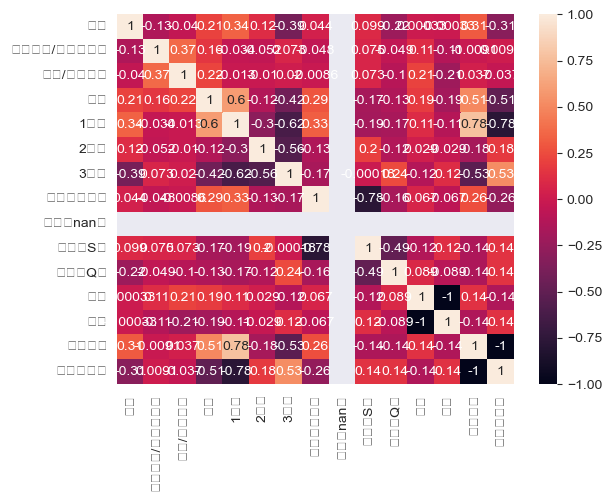

In [82]:
sns.heatmap(X_data.corr(),annot=True)

## 5 评价指标的计算
#### $ TPR = TP/(TP + FN) $ 也称为为—灵敏度
#### $ FPR = FP/(FP + TN) $
#### $ 1-FPR=特异度 $
### 以下是一个样例

In [139]:
import xgboost as xgb

sc = StandardScaler()
sc.fit(X_data)
X = sc.transform(X_data)
train_X,test_x,train_Y,test_y = train_test_split(X,Y,test_size=0.3193,random_state=42)

xgb1 = xgb.XGBClassifier( learning_rate =0.1
               , n_estimators=9 #即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越 大，模型的效果往往越好。但是相应的，任何模型都有决策边  n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
               , max_depth=12 #构建树的深度，越大越容易过拟合
               , min_child_weight=0.0001 #孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
               , num_class = 1#类别数，与 multisoftmax 并用
               , gamma=0 #损失下降多少才进行分裂， 控制叶子节点的个数
               , subsample=0.9#随机采样训练样本
               , colsample_bytree=0.97 #生成树时进行的列采样
               , objective= 'binary:logistic' # 损失函数，默认为"reg:linear"。 {'binary:logistic'}是二分类的问题，{'multi:softmax',}是多分类的问题 这个是优化目标，必须得有，因为xgboost里面有求一阶导数和二阶导数，其实就是这个。
               , nthread=4 #cpu 线程数
               , scale_pos_weight=1.0 #负样本总数/正样本总数 。若训练负样本总数是500 ，正样本总数100，那么设置 scale_pos_weigh为 5
#                , lambda_weight = 2 # 正则化参数
               , eta = 0.001 # 如同学习率
#                , num_round = 0.01
#               
#                , metrics='auc'
               , eval_metric = "auc"
#                 , silent = 0 # ,设置成1则没有运行信息输出，最好是设置为0.
               , seed=27#个随机指定一个常数，防止每次结果不一致
                )
train_Y = train_Y.reshape((train_Y.shape[0],1))
xgb1.fit(train_X,train_Y)
xgb1.score(test_x,test_y)

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

0.861244019138756

In [140]:
xgb_predict = xgb1.predict(test_x)
xgb_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,

In [141]:
xgb_predict_proba = xgb1.predict_proba(test_x)
xgb_predict_proba[:,1]

array([0.24916132, 0.42928666, 0.24717356, 0.24916132, 0.68366563,
       0.63086885, 0.68366563, 0.7782594 , 0.56016004, 0.38912836,
       0.24916132, 0.24916132, 0.5184562 , 0.78028685, 0.24916132,
       0.7782594 , 0.74065053, 0.24717356, 0.26505378, 0.24916132,
       0.24916132, 0.24916132, 0.2822233 , 0.2822233 , 0.24916132,
       0.5141486 , 0.3970157 , 0.2572632 , 0.24780644, 0.6563091 ,
       0.25315756, 0.7782594 , 0.7129924 , 0.25952935, 0.26443464,
       0.24717356, 0.69326395, 0.2702462 , 0.24717356, 0.5748161 ,
       0.42928666, 0.72076005, 0.7129924 , 0.24916132, 0.2643017 ,
       0.24916132, 0.24780644, 0.25176266, 0.68366563, 0.7782594 ,
       0.67153263, 0.78028685, 0.24916132, 0.29781482, 0.7782594 ,
       0.24717356, 0.24916132, 0.52164686, 0.27943674, 0.24916132,
       0.34035966, 0.24717356, 0.7782594 , 0.61939245, 0.78028685,
       0.31171957, 0.7782594 , 0.7782594 , 0.24916132, 0.24785604,
       0.24717356, 0.32938075, 0.3412635 , 0.24780644, 0.24785

### $TP(真阳性) = 真实值为1，预测值也为1的数量 $ 

In [142]:


TP = ((test_y==1) * (xgb_predict==1)).sum()
TP

124

### $ FN(假阴性) = 真实值为1，预测集为0的数量$

In [143]:
FN = ((test_y == 1) * (xgb_predict == 0)).sum()
FN

35

### $ TPR = TP/(TP + FN) $ 也称为为—灵敏度

In [144]:
TPR = TP/(TP+FN)
TPR

0.779874213836478

### $ FP(假阳性) = 真实值为0，预测值为1 的数量$ 

In [145]:
FP = ((test_y==0)*(xgb_predict==1)).sum()
FP

23

### $ TN(真阴性) = 真实值为0，预测值也为0 的数量$

In [146]:
TN = ((test_y==0)*(xgb_predict==0)).sum()
TN

236

### $ FPR = FP/(FP + TN) $

In [147]:
FPR = FP/(FP+TN)
FPR

0.0888030888030888

### $ 1-FPR=特异度 $

In [148]:
1-FPR

0.9111969111969112

In [149]:
from sklearn.metrics import accuracy_score
f"accuracy得分返回正确分类的比率：{accuracy_score(test_y,xgb_predict)}"

'accuracy得分返回正确分类的比率：0.861244019138756'

In [150]:
from sklearn.metrics import roc_curve
[fpr,tpr,thr]=roc_curve(test_y,xgb_predict_proba[:,1])
fpr,tpr

(array([0.        , 0.        , 0.00772201, 0.01158301, 0.01158301,
        0.01544402, 0.01544402, 0.01544402, 0.01930502, 0.01930502,
        0.01930502, 0.02316602, 0.02316602, 0.02702703, 0.02702703,
        0.02702703, 0.02702703, 0.02702703, 0.03088803, 0.03088803,
        0.03474903, 0.03861004, 0.03861004, 0.04247104, 0.04633205,
        0.04633205, 0.05791506, 0.06177606, 0.06177606, 0.06177606,
        0.06563707, 0.06563707, 0.07335907, 0.07335907, 0.08108108,
        0.08108108, 0.08880309, 0.08880309, 0.0965251 , 0.0965251 ,
        0.1003861 , 0.1003861 , 0.10810811, 0.11583012, 0.11583012,
        0.12355212, 0.12741313, 0.12741313, 0.13127413, 0.13127413,
        0.13513514, 0.13513514, 0.14671815, 0.14671815, 0.15057915,
        0.15057915, 0.15830116, 0.16216216, 0.16602317, 0.16602317,
        0.17374517, 0.17374517, 0.18146718, 0.18918919, 0.18918919,
        0.19305019, 0.1969112 , 0.1969112 , 0.2046332 , 0.21235521,
        0.21621622, 0.21621622, 0.22393822, 0.22

In [151]:
from sklearn.metrics import auc
f"auc得分：{auc(fpr,tpr)}"

'auc得分：0.9104441368592313'

### 手动计算auc得分

In [161]:
def AUC(label, pre):
    pos = [i for i in range(len(label)) if label[i] == 1]
    neg = [i for i in range(len(label)) if label[i] == 0]
    #计算正样本和负样本的索引，以便索引出之后的概率值
    auc = 0
    for i in pos:
        for j in neg:
            if pre[i] > pre[j]:
                auc += 1
            elif pre[i] == pre[j]:
                auc += 0.5
    return auc / (len(pos)*len(neg))

AUC(test_y,xgb_predict_proba[:,1])

0.9104441368592312

In [159]:
from sklearn.metrics import log_loss

f"log loss得分：{log_loss(test_y,xgb_predict_proba[:,1])}"

'log loss得分：0.43206069515082257'

### 6 十折验证 模型的效果

#### 6.1 十折 accuracy 得分均值

In [152]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(xgb1,X,Y,cv=10,scoring="accuracy")
scores_accuracy.mean()

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/X

0.8510980622431005

#### 6.2 十折 log loss 得分均值

In [155]:
score_log_loss = cross_val_score(xgb1,X,Y,cv=10,scoring="neg_log_loss")
-score_log_loss.mean()

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/X

0.4375838286697829

#### 6.3 十折 auc 得分均值

In [157]:
scores_auc = cross_val_score(xgb1,X,Y,cv=10,scoring="roc_auc")
scores_auc.mean()

/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/XgboostENV/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/zhangmanman/anaconda3/envs/X

0.8988875676738628

In [162]:
import xgboost as xgb

params = { "learning_rate":0.1
               , "n_estimators":10 #即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越 大，模型的效果往往越好。但是相应的，任何模型都有决策边  n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
               , "max_depth":12 #构建树的深度，越大越容易过拟合
               , "min_child_weight":0.1 #孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
#                , "num_class ":1#类别数，与 multisoftmax 并用
               , "gamma":0 #损失下降多少才进行分裂， 控制叶子节点的个数
               , "subsample":0.8 #随机采样训练样本
               , "colsample_bytree":1 #生成树时进行的列采样
               , "objective":'binary:logistic' # {'binary:logistic'}是二分类的问题，{'multi:softmax',}是多分类的问题 这个是优化目标，必须得有，因为xgboost里面有求一阶导数和二阶导数，其实就是这个。
               , "nthread":4 #cpu 线程数
               , "scale_pos_weight":1.0 #负样本总数/正样本总数 。若训练负样本总数是500 ，正样本总数100，那么设置 scale_pos_weigh为 5
#                , lambda_weight = 2 # 正则化参数
               , "eta":0.001 # 如同学习率
#               
#                , metrics='auc'
               , "eval_metric":"auc"
#                , "silent ": 0 # ,设置成1则没有运行信息输出，最好是设置为0.
               , "seed":27
        }
dtrain = xgb.DMatrix(train_X,label=train_Y)
dtest = xgb.DMatrix(test_x,label=test_y)
clf = xgb.train(params=params,dtrain=dtrain,num_boost_round=100,evals=[(dtrain,"train")],verbose_eval=True)
1-abs(np.array([c>0.5 and 1 or 0 for c in clf.predict(dtest)])-test_y).sum()/test_y.size

[16:46:43] WARNING: /croot/xgboost-split_1675119646044/work/src/learner.cc:576: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.89514
[1]	train-auc:0.90158
[2]	train-auc:0.91077
[3]	train-auc:0.91197
[4]	train-auc:0.92527
[5]	train-auc:0.93700
[6]	train-auc:0.93671
[7]	train-auc:0.94010
[8]	train-auc:0.95815
[9]	train-auc:0.95896
[10]	train-auc:0.96022
[11]	train-auc:0.96769
[12]	train-auc:0.97088
[13]	train-auc:0.97259
[14]	train-auc:0.97607
[15]	train-auc:0.97932
[16]	train-auc:0.98028
[17]	train-auc:0.98114
[18]	train-auc:0.98228
[19]	train-auc:0.98266
[20]	train-auc:0.98374
[21]	train-auc:0.98531
[22]	train-auc:0.98628
[23]	train-auc:0.98649
[24]	train-auc:0.98706
[25]	train-auc:0.98786
[26]	train-a

0.861244019138756

In [ ]:
# clf.predict(dtest)

In [ ]:
# xg_classifier = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 6, alpha = 10, n_estimators = 10)

# xg_classifier.fit(train_X,train_Y)
# xg_classifier.score(test_x, test_y)

In [ ]:
# dtrain = xgb.DMatrix(train_X,label=train_Y)
# dtest = xgb.DMatrix(test_x,label=test_y)

In [ ]:
# """paramet setting"""
# param = {
#     'max_depth': 2,
#     'eta': 0.007, # 如同学习率
#     'objective': 'binary:logistic',# {'binary:logistic'}是二分类的问题，{'multi:softmax',}是多分类的问题 这个是优化目标，必须得有，因为xgboost里面有求一阶导数和二阶导数，其实就是这个
#     'booster':'gbtree',# 这个指定基分类器
# #     'num_class':2 ,# 类别数，与 multisoftmax 并用
#     'gamma':0 ,# 损失下降多少才进行分裂， 控制叶子节点的个数
#     'max_depth':12,# 构建树的深度，越大越容易过拟合
#     'lambda':2, # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#     'subsample':0.7, # 随机采样训练样本
#     'colsample_bytree':0.7,# 生成树时进行的列采样
#     'min_child_weight':3, # 孩子节点中最小的样本权重和。如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束
#     'silent':0 , # 设置成1则没有运行信息输出，最好是设置为0.
#     'eta': 0.007,# 如同学习率
#     'seed':1000,
#     'nthread':6,# cpu 线程数
# }
# watch_list = [(dtest, 'eval'), (dtrain, 'train')]  # 这个是观测的时候在什么上面的结果  观测集
# num_round = 5
# model = xgb.train(params=param, dtrain=dtrain, num_boost_round=num_round, evals=watch_list)

In [ ]:
# pred = model.predict(dtest) 
# pred

In [ ]:
# Label_encoder = LabelEncoder()
# integer_encoded = Label_encoder.fit_transform(titanic_data["舱位"])
# integer_encoded